# About the challenge

The objective of this challenge is to develop a machine learning model to assess if a Twitter post is about covid-19 or not.The data used for this challenge has been collected by the Zindi team via Twitter API from tweets over the past year. The are 7,000 tweets.

Tweets have been classified as covid-19-related (1) or not covid-19-related (0). All tweets have had the following keywords removed:
- corona
- coronavirus
- covid
- covid19
- covid-19
- sarscov2
- 19

In [55]:
# %import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

In [56]:
tweets = pd.read_csv("../data/tweets.csv")

In [57]:
tweets.head(12)

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0
5,train_5,FIFA has proposed allowing teams to make up to...,0
6,train_6,Lovers of sports especially do you know why so...,0
7,train_7,ig he kinda cute sometimes smh,0
8,train_8,Frontline health workers are critical in the f...,1
9,train_9,Contact centers are getting overwhelmed with c...,0


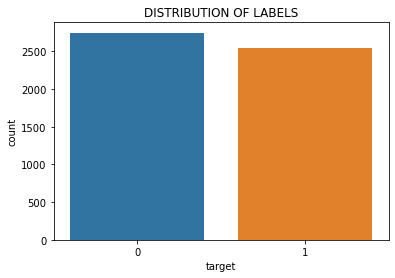

In [58]:
# %Visualize the target column

sns.countplot(x='target',data=tweets)
plt.title("DISTRIBUTION OF LABELS")
plt.show()

In [59]:
tweets[tweets['target'] == 1 ].loc[8,'text']

'Frontline health workers are critical in the fight against infectious diseases not just  They protect communit'

In [60]:
tweets[tweets['target'] == 0 ].loc[1,'text']

'MercyOfAllah In good times wrapped in its granular detail I challenge myself to find meaning and model the humility t'

### DATA PREPROCESSING

#### 1. REMOVE PUNCTUATION

In [61]:
# %function to remove punctuation using string library
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

tweets['text'] = tweets['text'].apply(remove_punctuation)
tweets.head(3)

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1


#### 2. REMOVING WHITE SPACES

In [62]:
def remove_space(text):
    '''a function for removing spaces'''
    txt = re.sub("\s+"," ", text)
    return txt

tweets['text'] = tweets['text'].apply(remove_space)
tweets.head(3)

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1


#### 3. COVERTING TO LOWERCASE

In [63]:
tweets['text'] = tweets['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
tweets.head(3)

,ID,text,target
0,train_0,the bitcoin halving is cancelled due to,1
1,train_1,mercyofallah in good times wrapped in its gran...,0
2,train_2,266 days no digital india no murder of e learn...,1


#### 4. REMOVE STOP WORDS

In [64]:
import nltk
nltk.download('stopwords') # %download stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mepower/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
allstopwords = nltk.corpus.stopwords.words("english")
tweets['text'] = tweets['text'].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
tweets.head(3)

,ID,text,target
0,train_0,bitcoin halving cancelled due,1
1,train_1,mercyofallah good times wrapped granular detai...,0
2,train_2,266 days digital india murder e learning 2g on...,1


#### 5. REMOVING NUMBERS

In [66]:
def remove_numbers(text):
    '''a function to remove numbers'''
    txt = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    return txt

tweets['text'] = tweets['text'].apply(remove_numbers)
tweets.head(3)

,ID,text,target
0,train_0,bitcoin halving cancelled due,1
1,train_1,mercyofallah good times wrapped granular detai...,0
2,train_2,days digital india murder e learning 2g online...,1


#### 6. TOKENIZATION

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mepower/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
tokenized_tweets = tweets['text'].apply(lambda x: x.split())


#### 7. STEMMING 

In [69]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])

In [70]:
# join tokens into one sentence
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

In [71]:
tweets['text']  = tokenized_tweets
tweets.head()

,ID,text,target
0,train_0,bitcoin halv cancel due,1
1,train_1,mercyofallah good time wrap granular detail ch...,0
2,train_2,day digit india murder e learn 2g onlin busi r...,1
3,train_3,india like run remain rna kit essenti test one...,1
4,train_4,tough time best way grow learn case teach help...,0


#### 8. STORY GENERATION AND VISUALIZATION FROM TWEETS

- What are the most common words in the entire dataset?

- What are the most common words in the dataset for each class, respectively?

- Which trends are associated with my dataset?

- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) Understanding the common words used in the content: WordCloud

In [72]:
from wordcloud import WordCloud

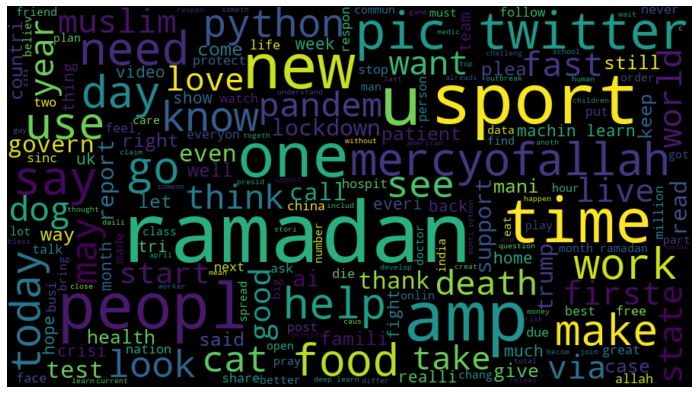

In [73]:
# create text from all tweets
all_words = ' '.join([text for text in tweets['text']])
wordcloud = WordCloud(width=900, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

B) Understanding the common words from class associated with Covid tweets

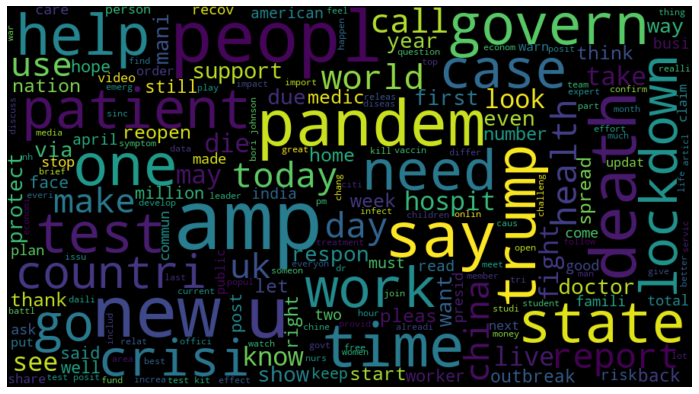

In [74]:
# create text from just covid tweets
normal_words = ' '.join([text for text in tweets['text'][tweets['target'] == 1]])

wordcloud = WordCloud(width=900, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

B) Understanding the common words from class associated with Covid tweets

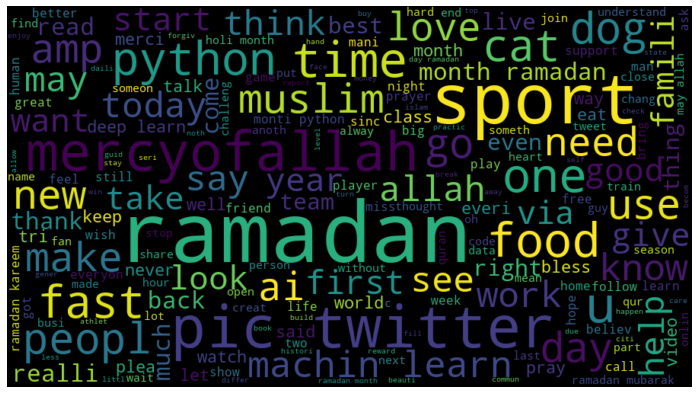

In [75]:
# create text from just non covid tweets
normal_words = ' '.join([text for text in tweets['text'][tweets['target'] == 0]])
wordcloud = WordCloud(width=900, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 9.  FEATURE EXTRACTION AND CLASSIFICATION

In [76]:
# %Keeping only the neccessary columns
tweets = tweets[['text','target']]
tweets.head()

,text,target
0,bitcoin halv cancel due,1
1,mercyofallah good time wrap granular detail ch...,0
2,day digit india murder e learn 2g onlin busi r...,1
3,india like run remain rna kit essenti test one...,1
4,tough time best way grow learn case teach help...,0


In [77]:
from sklearn.model_selection import train_test_split

# %Splitting the dataset into train and test set
train, test = train_test_split(tweets,test_size = 0.2,shuffle=True)

train.shape, test.shape

((4229, 2), (1058, 2))

In [78]:
from nltk.corpus import stopwords

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.target))

In [83]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, target) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [84]:
test_covid = test[ test['target'] == 1]
test_covid = test_covid['text']
test_nocovid = test[ test['target'] == 0]
test_nocovid = test_nocovid['text']

Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [87]:
from nltk.classify import SklearnClassifier

training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [88]:
noncovid_cnt = 0
covid_cnt = 0
for obj in test_nocovid: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0): 
        noncovid_cnt = noncovid_cnt + 1
for obj in test_covid: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1): 
        covid_cnt = covid_cnt + 1
        
print('[Non Covid]: %s/%s '  % (len(test_nocovid),noncovid_cnt))        
print('[Covid]: %s/%s '  % (len(test_covid),covid_cnt)) 

[Non Covid]: 520/465 
[Covid]: 538/474 
